<a href="https://colab.research.google.com/github/igormcsouza/analise-de-dados-em-python/blob/master/Problema_do_Plano_de_Sa%C3%BAde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Usando Tensor Flow para resolver problemas de regressão linear

Regressão linear é um problema de encontrar uma reta que melhor se adeque aos meus dados, a função que caracteriza a regressão linear é dada como a seguir: y = a0 + a1*x


Para resolvermos esse problema, vamos dividir nossos esforços em 2 grupos, preparação dos dados e modelagem do problema.

### 1) Pré-processamento dos dados

Para tal, vamos usar numpy array e a biblioteca scikit-learn.

Vamos usar a padronização simples dos dados para levar eles para valores mais pequenos, para que facilite o processamento

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# O problema de regressão abaixo visa prever o custo do plano de saúde
# dado a idade do cliente. Ou seja, X[i] representa a idade da pessoa i
# e o y[i] representa o quanto essa pessoa i paga no plano de saúde.

#Vamos preparar os dados aplicando a padronização

#A variável X será a idade do cliente
X = np.array([[18], [23], [28], [33], [38], [43], [48], [53], [58], [63]])
#A variável y é o custo para as idades acima
y = np.array([[871], [1132], [1042], [1356], [1488], [1638], [1569], [1754], [1866], [1900]])

# No TensorFlow é importante fazer o pré-processamento, isso ajuda na hora dos calculos.

from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler() # Vamos guardar as informações de escala para retornar os dados depois.
X = scaler_x.fit_transform(X)
X

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [0]:
scaler_y = StandardScaler() # Vamos guardar as informações de escala para retornar os dados depois.
y = scaler_y.fit_transform(y)
y

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.75751985],
       [-0.98083058],
       [-1.24865447],
       [-0.31424669],
       [ 0.07856167],
       [ 0.52493481],
       [ 0.31960317],
       [ 0.87013004],
       [ 1.20342199],
       [ 1.3045999 ]])

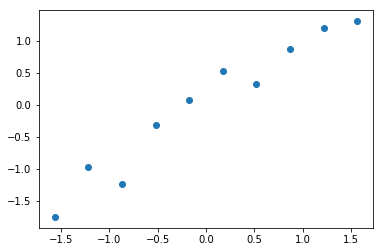

In [0]:
%matplotlib inline

# A bibliotema matplotlib nos ajuda a vizualizar os dados.
# No caso, vamos ver no R2 nossos dados.
plt.scatter(X, y)

### 2) Modelagem do Problema

Lembrando que a formula para calcular a regressão é dada como a seguir: y = b0 + b1*X

#### O que é esse b0?

A unidade de Bayas, como é chamada, serve para nos dá um ponta-pé inicial, as vezes não vamos ter uma informação precisa sobre os dados, o b0 vai fazer o trabalho de sustentar o resultado para que ele não seja 0.

Matematicamente falando, o que estamos fazendo é jogando minha função para um espaço afim, descolado do (0,0). Estamos então encontrando uma transformação no espaço afim.

#### Por que geramos valores aleatórios para meus b's?

Ao invés de tentar resolver a equação e descobrir a formula exata, vamos optar por tentar encontrar, via tentativa e erro, a matriz de transformação exata, isso é computacionalmente mais estável e mais rápido também.

Vamos usar a Descida de Gradiente para nos ajudar no processo de achar o menor erro possível.

In [0]:
# Agora finalmene vamos treinar nosso algoritmo de regressão
import tensorflow as tf

np.random.seed(0)
values = np.random.rand(2) # Gera dois aleatórios para serem o b's
print(values)

# Inicializa as variaveis da equação
b0 = tf.Variable(values[0])
b1 = tf.Variable(values[1])

# Armazena o erro, usaremos o MeanSquaredError como target para minimizar
erro = tf.losses.mean_squared_error(y, (b0 + b1 * X))

# Seleciona o otimizador e seta a taxa de aprendizagem
''' Descida de gradiente é uma das técinicas mais usadas de otmização, ela é 
bem robusta e trás varios benefícios, ela tenta encontrar uma seta, que aponta
para o valor ótimo, ela me diz não somente para aonde ir, mas qual o grau do 
meu passo, se deve ser grande ou pequeno.'''
opt = tf.train.GradientDescentOptimizer(learning_rate=0.001)

#Treina o algoritmo, utilizando o otimizador, ele tenta minimizar o erro
train = opt.minimize(erro)

[0.5488135  0.71518937]


In [0]:
#Inicia as variaveis
init = tf.global_variables_initializer()

# Inicializa a variável epocas
''' Todos esses passos acontecem uma única vez, parte da aplicação é selecionar
um valor 'epocas' para dizer quantas vezes vamos repetir o processo.
Isso não significa que fazer muitas vezes é a solução do problema. Como estamos
usando a descida de gradiente para fazer o trabalho de minimização e atualização
dos pesos, pode chegar um momento que, ao chegar muito próximo do ótimo, ele dá
um salto para bem longe, invertendo o esperado. Saber qual o melhor numero de
épocas também faz parte de conhecer o algoritmo e a base de dados.'''
epocas = 1000

# Lembrando que no TensorFlow nada acontece até abrir a sessão
with tf.Session() as s:
    s.run(init)
    for i in range(epocas):
        s.run(train)
    b0_f, b1_f = s.run([b0, b1])
    
print(b0_f)
print(b1_f)

0.0741252198350752
0.9366144987169919


In [0]:
# Vamos setar nosso vetor previsão

prev = b0_f + b1_f * X
prev

array([[-1.39326769],
       [-1.06718038],
       [-0.74109306],
       [-0.41500575],
       [-0.08891844],
       [ 0.23716888],
       [ 0.56325619],
       [ 0.8893435 ],
       [ 1.21543082],
       [ 1.54151813]])

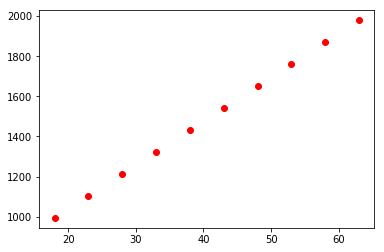

In [0]:
plt.plot(scaler_x.inverse_transform(X), scaler_y.inverse_transform(prev), 'o', color='red')

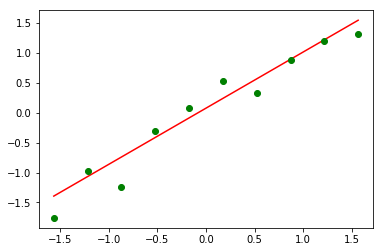

In [0]:
plt.plot(X, prev, color='red')
plt.plot(X, y, 'o', color='green')

In [0]:
# Podemos ainda criar uma função para fazer as previsões

def previsao(a, x):
    return scaler_y.inverse_transform(a[0] + (a[1] * scaler_x.fit_transform([[x]])))

previsao((b0_f, b1_f), 40)

array([[1486.50916664]])

In [0]:
# Vamos comparar os resultados obtidos com os reais

y1 = scaler_y.inverse_transform(y)
prev1 = scaler_y.inverse_transform(prev)

from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(y1, prev1))
print(mean_squared_error(y1, prev1))

68.08077601206267
7168.148446336729
